## Modeling (ADASYN)

In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from xgboost import XGBClassifier
import collections


# Other Libraries
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
import warnings

import torch 
from matplotlib.colors import LogNorm
from PIL import Image
import cv2 
import ssl
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from keras.utils import to_categorical

import xgboost as xgb
from bayes_opt import BayesianOptimization
import os
import ast 
from itertools import chain
import cv2

warnings.filterwarnings("ignore")

In [2]:
# example of using the vgg16 model as a feature extraction model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
from pickle import dump

In [3]:
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import ssl
import pickle
ssl._create_default_https_context = ssl._create_unverified_context

In [56]:
new_df2 = pd.read_csv('/Users/ipsitapraharaj/Desktop/Paypal/new_df2.csv')

In [57]:
new_df2.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.293440,-0.308239,1.225134,-0.022438,-1.340685,-0.028499,2.219520,3.305280,-0.309185,0.754329,...,0.060224,-0.002023,-0.196183,-0.169192,1.005993,0.833630,-0.316968,0.008983,0.020295,0
1,-0.269825,-0.240640,-0.339856,1.133411,1.293150,0.060846,0.031996,-0.981876,0.710514,-0.072957,...,0.112842,-0.264399,-0.689910,-0.016781,0.328824,-0.160102,0.072207,0.245846,0.098203,0
2,0.994481,-0.046958,0.989051,-0.616370,1.339392,0.232070,-1.429382,-0.235047,-0.841582,0.169445,...,0.070261,0.294783,0.718315,-0.005765,0.489920,-0.089615,1.113943,-0.029256,0.036695,0
3,-0.179976,-0.191638,-0.343007,0.873912,1.532950,-0.015098,0.066363,-0.785618,0.738052,-0.100468,...,0.149330,-0.254991,-0.596722,-0.008310,0.456624,-0.273706,0.016500,0.068663,-0.133746,0
4,0.220080,-0.422538,-0.138347,0.396335,1.605100,-0.171795,0.153055,-0.861441,1.215668,-0.899729,...,0.172339,-0.278707,-0.346969,0.015514,0.426811,-0.630698,0.735150,-0.763186,-0.604940,0


In [58]:
# Implement simple classifiers on train
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

grid_par ={}

#### Baseline

In [59]:
def base(X_train, X_test, y_train, y_test):
    for key, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        test_score = cross_val_score(classifier,  X_test, y_test, cv=5)
        print( classifier.__class__.__name__, " test accuracy score = ", 
              round(test_score.mean(), 2) * 100)

#### GridSearch

In [60]:
def grid(X_train, X_test, y_train, y_test):
 
    # Logistic Regression 
    log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.1, 1, 10, 100]}
    grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
    grid_log_reg.fit(X_train, y_train)
    log_reg = grid_log_reg.best_estimator_
    grid_par['log_reg_params'] = log_reg

    # DecisionTree Classifier
    tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
                  "min_samples_leaf": list(range(5,7,1))}
    grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
    grid_tree.fit(X_train, y_train)
    tree_clf = grid_tree.best_estimator_
    grid_par['tree_params'] = tree_clf

    #output estimated
    log_reg_pred = cross_val_predict(log_reg, X_test, y_test, cv=5)
    tree_pred = cross_val_predict(tree_clf, X_test, y_test, cv=5)

    # Predicting train after Grid search + Cross validation
    log_reg_score = cross_val_score(log_reg,X_test, y_test, cv=5)
    print('Logistic Regression Cross Validation Score on test: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
    
    tree_score = cross_val_score(tree_clf,  X_test, y_test, cv=5)
    print('DecisionTree Classifier Cross Validation Score  on test', round(tree_score.mean() * 100, 2).astype(str) + '%')
    
    # Confusion Matrix
    log_reg_cf = confusion_matrix(y_test, log_reg_pred)
    tree_cf = confusion_matrix(y_test, tree_pred)

    fig, ax = plt.subplots(1, 2,figsize=(15,3))


    sns.heatmap(log_reg_cf, ax=ax[0], annot=True, cmap="YlGnBu")
    ax[0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
    ax[0].set_xticklabels(['', ''], fontsize=14, rotation=90)
    ax[0].set_yticklabels(['', ''], fontsize=14, rotation=360)
    
    sns.heatmap(tree_cf, ax=ax[1], annot=True, cmap="YlGnBu")
    ax[1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
    ax[1].set_xticklabels(['', ''], fontsize=14, rotation=90)
    ax[1].set_yticklabels(['', ''], fontsize=14, rotation=360)
    
    
    #ROC & graphs
    roc(log_reg_pred,  tree_pred)
    

#### ROC Curves Gridsearch prediction

In [61]:
def roc(log_reg_pred, tree_pred):  
    log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
    tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)

    #ploting all classifers roc
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(20, 4))
    ax1.set_title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    ax1.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.
             format(roc_auc_score(y_test, log_reg_pred)))
    ax1.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.
             format(roc_auc_score(y_test, tree_pred)))

    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.axis([-0.01, 1, 0, 1])
    ax1.set_xlabel('False Positive Rate', fontsize=16)
    ax1.set_ylabel('True Positive Rate', fontsize=16)
    ax1.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, .5), xytext=(0.3, 0.7),
                arrowprops=dict(facecolor='#C5B3F9', shrink=0.07),)
    ax1.legend()


    #ploting Log Reg classifers roc
    ax2.set_title('Logistic Regression ROC Curve', fontsize=16)
    ax2.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    ax2.plot([0, 1], [0, 1], 'r--')
    ax2.set_xlabel('False Positive Rate', fontsize=16)
    ax2.set_ylabel('True Positive Rate', fontsize=16)
    ax2.axis([-0.01,1,0,1])


#### Displaying results (ADASYN data)

In [62]:
# Undersampling before cross validating (prone to overfit)
X = new_df2.drop('Class', axis=1)
y = new_df2['Class']

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


--------------------
Basic results 

LogisticRegression  test accuracy score =  84.0
DecisionTreeClassifier  test accuracy score =  98.0
--------------------

Grid search results 

Best grid paramenter  --> dict_values([])

Logistic Regression Cross Validation Score on test:  84.94%
DecisionTree Classifier Cross Validation Score  on test 84.44%
CPU times: user 24.8 s, sys: 784 ms, total: 25.6 s
Wall time: 18.5 s


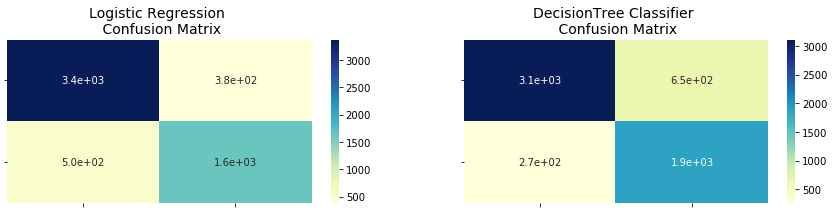

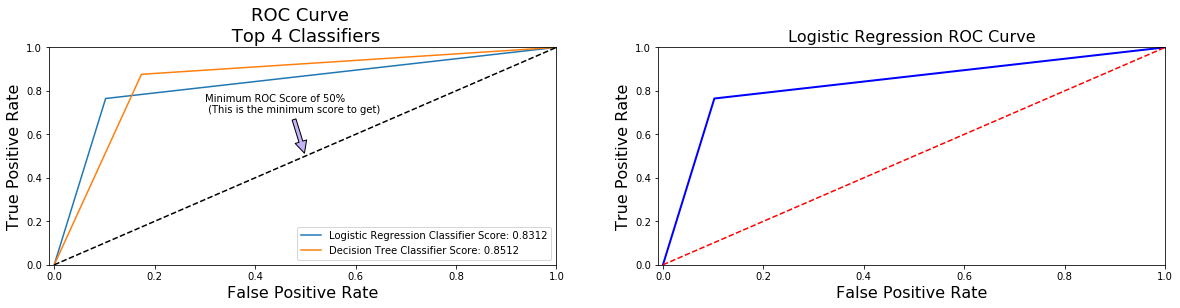

In [63]:
%%time
print('-'*20)
print('Basic results \n')
base(X_train, X_test, y_train, y_test)

print('-'*20)
print('\nGrid search results \n')
print("Best grid paramenter  --> "+str(grid_par.values())+"\n")
grid(X_train, X_test, y_train, y_test)


### Feature Engineering

#### Displaying results (ADASYN data + feature selection)

In [72]:
# Undersampling before cross validating (prone to overfit)
X = new_df2.drop('Class', axis=1)
y = new_df2['Class']

In [73]:
imp ={}
imp_col = []
def feature_select():
    
    for key, classifier in classifiers.items():
#     try:
        rfecv = RFECV(estimator=classifier, cv=StratifiedKFold(2), step=6, scoring='accuracy')
        rfecv.fit(X_train,y_train)

        print(str(key)+" Optimal number of features : %d" % rfecv.n_features_)
        imp[key] = [X.columns[i] for i,v in enumerate(list(rfecv.ranking_))  if v in [1]]
        print(imp[key], "\n")
#         except:
#             print('')

    imp_col = list(imp[key])
    return imp_col

imp_col = feature_select()

LogisiticRegression Optimal number of features : 30
['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'] 

Decision Tree Classifier Optimal number of features : 24
['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V7', 'V8', 'V9', 'V11', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'] 



In [74]:
X_train, X_test, y_train, y_test = train_test_split(X[imp_col], y, test_size=0.2, random_state=42, stratify = y)
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

--------------------
Basic results 

LogisticRegression  test accuracy score =  83.0
DecisionTreeClassifier  test accuracy score =  98.0
--------------------

Grid search results 

Best grid paramenter  --> dict_values([LogisticRegression(C=100), DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)])

Logistic Regression Cross Validation Score on test:  82.82%
DecisionTree Classifier Cross Validation Score  on test 84.44%
CPU times: user 20.1 s, sys: 798 ms, total: 20.9 s
Wall time: 15.5 s


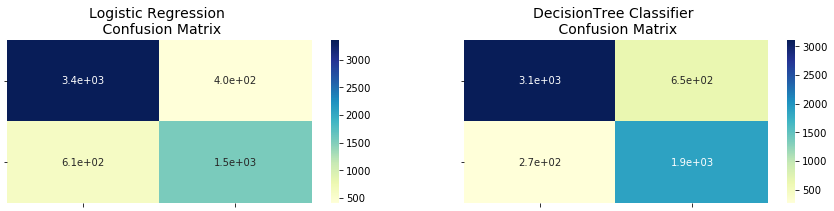

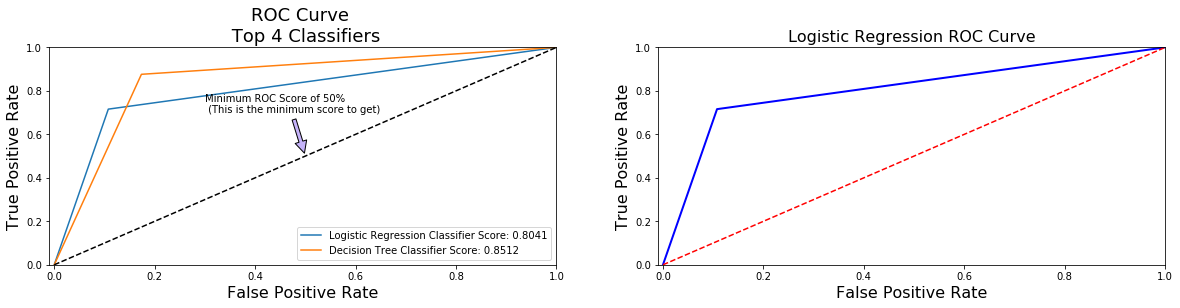

In [75]:
%%time
print('-'*20)
print('Basic results \n')
base(X_train, X_test, y_train, y_test)

print('-'*20)
print('\nGrid search results \n')
print("Best grid paramenter  --> "+str(grid_par.values())+"\n")
grid(X_train, X_test, y_train, y_test)


## CNN 2D image classification

In [87]:
# Undersampling before cross validating (prone to overfit)
X = new_df2.drop('Class', axis=1)
y = new_df2['Class']

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [88]:
%%time

def imager(X):
    X = np.array([np.concatenate((i,(np.zeros(6)))).reshape(6,6) for i in X])
    X = np.array([np.stack((i,)*3, axis=-1) for i in X])
    X = np.array([cv2.resize(i , (int(32),int(32)), interpolation = cv2.INTER_AREA) for i in X])
    return X

X_train = imager(X_train)
X_test = imager(X_test)


CPU times: user 1.46 s, sys: 746 ms, total: 2.21 s
Wall time: 2.53 s


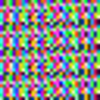

In [26]:
Image.fromarray(X_train[1], 'RGB').resize((100,100))

#### Transfer learning saves time

In [27]:
base_model = VGG16(input_shape = (32, 32, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
%%time
model.fit(X_train, y_train, epochs=3, 
                    validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

Epoch 1/3
739/739 [==============================] - 209s 283ms/step - loss: 0.2261 - accuracy: 0.9097 - val_loss: 0.1314 - val_accuracy: 0.9607
Epoch 2/3
739/739 [==============================] - 198s 268ms/step - loss: 0.1191 - accuracy: 0.9573 - val_loss: 0.1116 - val_accuracy: 0.9606
Epoch 3/3
739/739 [==============================] - 183s 248ms/step - loss: 0.0839 - accuracy: 0.9707 - val_loss: 0.0700 - val_accuracy: 0.9792
185/185 - 34s - loss: 0.0700 - accuracy: 0.9792
CPU times: user 33min 4s, sys: 1min 10s, total: 34min 15s
Wall time: 11min 2s


(array([3298.,  205.,   87.,   58.,   42.,   33.,   38.,   49.,   89.,
        2009.]),
 array([2.3168322e-18, 9.9998817e-02, 1.9999763e-01, 2.9999647e-01,
        3.9999527e-01, 4.9999410e-01, 5.9999293e-01, 6.9999176e-01,
        7.9999053e-01, 8.9998937e-01, 9.9998820e-01], dtype=float32),
 <a list of 10 Patch objects>)

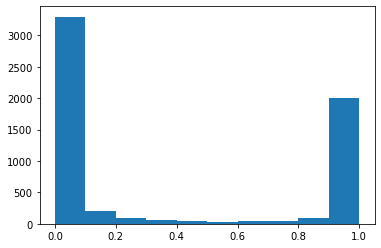

In [33]:
plt.hist(y_pred)

In [48]:
p = y_pred
for i in p:
    if (i[0]>0.7):
        i[0] = int(1)
    else:
        i[0]= int(0)

----------------------------------------
----------------------------------------

Classifier acc=  98.0

Classification_report  
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3761
         1.0       0.97      0.97      0.97      2147

    accuracy                           0.98      5908
   macro avg       0.98      0.98      0.98      5908
weighted avg       0.98      0.98      0.98      5908



[Text(0, 0.5, ''), Text(0, 1.5, '')]

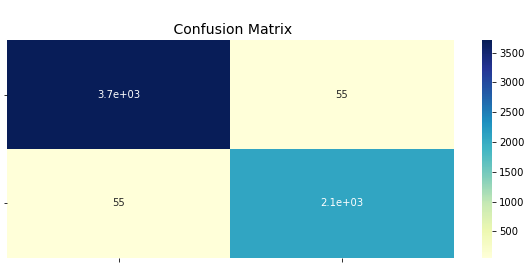

In [50]:
cf = confusion_matrix(y_test,p)
acc = cf.diagonal().sum()/cf.sum()

print('--'*20)
print('--'*20)
print("\nClassifier acc= ",round(acc,2)*100)
print("\nClassification_report  \n",classification_report(p, y_test))

f, ax = plt.subplots(1,1, figsize=(10, 4))
sns.heatmap(cf, ax=ax, annot=True, cmap="YlGnBu")
ax.set_title("\n Confusion Matrix", fontsize=14)
ax.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax.set_yticklabels(['', ''], fontsize=14, rotation=360)

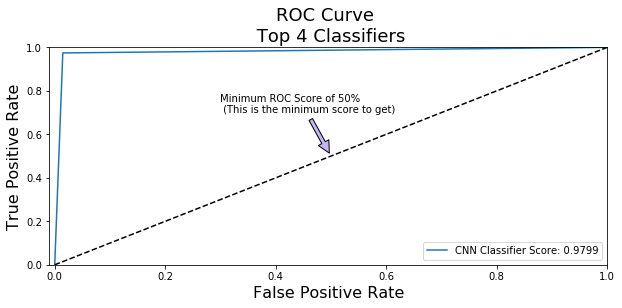

In [51]:
cnn_fpr, cnn_tpr, cnn_thresold = roc_curve(y_test, y_pred)

#ploting all classifers roc
f, (ax1) = plt.subplots(1,1, figsize=(10, 4))
ax1.set_title('ROC Curve \n Top 4 Classifiers', fontsize=18)
ax1.plot(cnn_fpr, cnn_tpr, label='CNN Classifier Score: {:.4f}'.
         format(roc_auc_score(y_test, y_pred)))

ax1.plot([0, 1], [0, 1], 'k--')
ax1.axis([-0.01, 1, 0, 1])
ax1.set_xlabel('False Positive Rate', fontsize=16)
ax1.set_ylabel('True Positive Rate', fontsize=16)
ax1.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, .5), xytext=(0.3, 0.7),
            arrowprops=dict(facecolor='#C5B3F9', shrink=0.07),)
ax1.legend()

In [76]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("model_cnn2D.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model_cnn2D.h5")
# print("Saved model to disk")

Saved model to disk


In [21]:
%%time
from keras.models import model_from_json
# load json and create model
json_file = open('model_cnn2D.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_cnn2D.h5")
print("Loaded model from disk")
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
loaded_model = loaded_model.fit(X_train, y_train, epochs=1, 
                    validation_data=(X_test, y_test))

Loaded model from disk
739/739 [==============================] - 226s 306ms/step - loss: 0.0469 - accuracy: 0.9842 - val_loss: 0.0346 - val_accuracy: 0.9912
CPU times: user 9min 44s, sys: 21.7 s, total: 10min 6s
Wall time: 3min 48s


### Original test data set - LR & DT

In [84]:
test_df = pd.read_csv('/Users/ipsitapraharaj/Desktop/Paypal/orig_test_df.csv')

In [85]:
test_df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.293579,-0.410343,-0.334463,1.186841,1.310615,0.054110,0.085975,-0.970724,0.749280,-0.108263,...,0.147669,-0.258214,-0.637832,-0.028227,0.351554,-0.140746,0.069840,0.250624,0.099393,0
1,0.408300,0.983799,-1.114370,0.297951,-0.770018,-1.212001,2.535608,3.951148,-0.145512,1.543896,...,0.126614,-0.259903,-0.765249,0.047789,0.713687,0.014445,0.131772,0.225937,0.080479,0
2,-0.181793,0.569943,-0.257022,0.926352,-0.696905,-1.012072,0.803521,0.161527,0.400225,0.605277,...,-0.145641,-0.255678,-0.832947,0.043502,-0.396128,-0.374679,0.160215,0.101116,0.018917,0
3,0.041780,0.879498,1.995531,-0.416104,-0.551114,0.323979,-0.330638,-0.011574,-0.571993,-0.033369,...,-0.049449,0.191435,0.768250,0.102971,0.569976,-0.129544,0.590779,-0.023482,-0.039797,0
4,1.198211,-0.235999,-5.002971,0.092067,0.429994,-2.392688,1.046462,0.301112,2.346360,-3.940798,...,-1.596305,0.418621,-0.705723,-0.249817,-0.289122,-0.339347,-1.697018,-4.706341,-2.886038,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,2.345839,-0.382218,0.845534,-0.708998,0.714626,0.525801,-0.989718,-0.102807,-0.389243,0.127152,...,0.275455,0.129864,-0.091715,-0.145870,0.012840,0.075658,0.377730,-0.049846,0.043482,0
25628,-0.293440,-0.231347,1.276257,0.575129,-0.833187,0.970271,0.627460,-0.273383,0.120064,0.030139,...,-0.109664,-0.103692,-0.302062,-0.269059,-0.997101,0.784904,-0.269254,0.023719,0.033448,0
25629,0.237546,0.349088,2.189540,-1.482190,-0.702172,-1.661008,-1.220925,-0.078118,-1.326385,-0.008469,...,-0.302776,-0.066453,0.262772,0.262836,0.707606,-0.293815,-0.231683,0.022177,-0.041922,0
25630,0.206665,0.794265,0.380374,-0.062536,-0.162576,-0.755413,0.188744,0.436322,0.210087,0.064678,...,-0.390021,-0.079993,0.432148,0.108865,0.252339,-1.287111,0.571119,0.263589,0.266694,0


In [79]:
orig_X_test = test_df.drop('Class', axis=1)
orig_y_test = test_df['Class']

orig_X_test = orig_X_test[imp_col]

# Turn the values into an array for feeding the classification algorithms.

orig_X_test = orig_X_test.values
orig_y_test = orig_y_test.values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X[imp_col], y, test_size=0.2, random_state=42, stratify = y)
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

----------------------------------------
----------------------------------------
log_reg_params
Classifier acc=  90.0

Classification_report  
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     23000
           1       0.34      0.01      0.01      2632

    accuracy                           0.90     25632
   macro avg       0.62      0.50      0.48     25632
weighted avg       0.84      0.90      0.85     25632

----------------------------------------
----------------------------------------
tree_params
Classifier acc=  84.0

Classification_report  
               precision    recall  f1-score   support

           0       0.84      1.00      0.91     21466
           1       0.23      0.00      0.00      4166

    accuracy                           0.84     25632
   macro avg       0.53      0.50      0.46     25632
weighted avg       0.74      0.84      0.76     25632



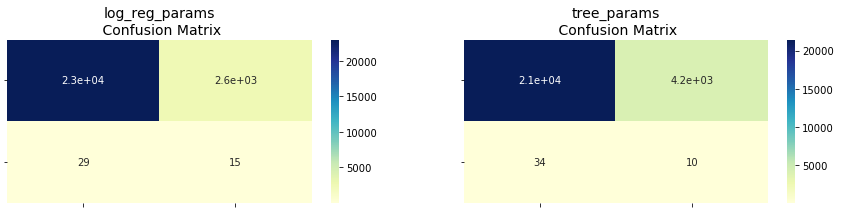

In [81]:
fig, ax = plt.subplots(1,len(grid_par) ,figsize=(15,3))
p = 0
for k,v in (grid_par).items():
    m = v.fit(X_train, y_train)
    pred = m.predict(orig_X_test)
    cf = confusion_matrix(orig_y_test,m.predict(orig_X_test))
    acc = cf.diagonal().sum()/cf.sum()
    
    print('--'*20)
    print('--'*20)
    print(str(k)+"\nClassifier acc= ",round(acc,2)*100)
    print("\nClassification_report  \n",classification_report(pred, orig_y_test))
    
    
    sns.heatmap(cf, ax=ax[p], annot=True, cmap="YlGnBu")
    ax[p].set_title(str(k)+"\n Confusion Matrix", fontsize=14)
    ax[p].set_xticklabels(['', ''], fontsize=14, rotation=90)
    ax[p].set_yticklabels(['', ''], fontsize=14, rotation=360)
    p = p+1
    

### Original Test set with CNN 2D 

In [89]:
orig_X_test = test_df.drop('Class', axis=1)
orig_y_test = test_df['Class']

# orig_X_test = orig_X_test[imp_col]

# Turn the values into an image for feeding the classification algorithms.
orig_X_test = imager(orig_X_test.values)
orig_y_test = orig_y_test.values

In [92]:
%%time
y_pred = model.predict(orig_X_test)

CPU times: user 8min 19s, sys: 11.4 s, total: 8min 30s
Wall time: 2min 58s


(array([22188.,  1150.,   591.,   391.,   287.,   223.,   184.,   191.,
          176.,   251.]),
 array([0.        , 0.09999922, 0.19999844, 0.29999766, 0.39999688,
        0.4999961 , 0.5999953 , 0.69999456, 0.79999375, 0.89999294,
        0.9999922 ], dtype=float32),
 <a list of 10 Patch objects>)

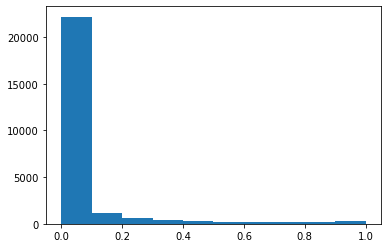

In [93]:
plt.hist(y_pred)

#### Cut off threshold

In [104]:
p = y_pred
for i in p:
    if (i[0]>0.8):
        i[0] = int(1)
    else:
        i[0]= int(0)

----------------------------------------
----------------------------------------

Classifier acc=  97.0

Classification_report  
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     25014
         1.0       0.07      0.00      0.01       618

    accuracy                           0.97     25632
   macro avg       0.52      0.50      0.50     25632
weighted avg       0.95      0.97      0.96     25632



[Text(0, 0.5, ''), Text(0, 1.5, '')]

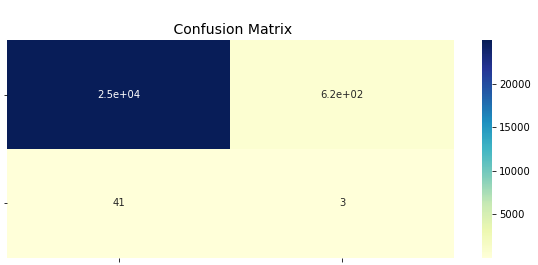

In [105]:
cf = confusion_matrix(orig_y_test,p)
acc = cf.diagonal().sum()/cf.sum()

print('--'*20)
print('--'*20)
print("\nClassifier acc= ",round(acc,2)*100)
print("\nClassification_report  \n",classification_report(p, orig_y_test))

f, ax = plt.subplots(1,1, figsize=(10, 4))
sns.heatmap(cf, ax=ax, annot=True, cmap="YlGnBu")
ax.set_title("\n Confusion Matrix", fontsize=14)
ax.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax.set_yticklabels(['', ''], fontsize=14, rotation=360)

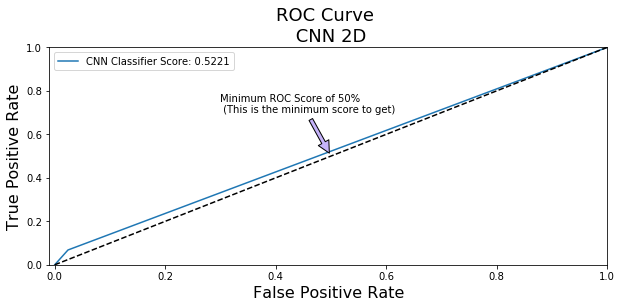

In [107]:
cnn_fpr, cnn_tpr, cnn_thresold = roc_curve(orig_y_test, y_pred)

#ploting all classifers roc
f, (ax1) = plt.subplots(1,1, figsize=(10, 4))
ax1.set_title('ROC Curve \n CNN 2D', fontsize=18)
ax1.plot(cnn_fpr, cnn_tpr, label='CNN Classifier Score: {:.4f}'.
         format(roc_auc_score(orig_y_test, y_pred)))

ax1.plot([0, 1], [0, 1], 'k--')
ax1.axis([-0.01, 1, 0, 1])
ax1.set_xlabel('False Positive Rate', fontsize=16)
ax1.set_ylabel('True Positive Rate', fontsize=16)
ax1.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, .5), xytext=(0.3, 0.7),
            arrowprops=dict(facecolor='#C5B3F9', shrink=0.07),)
ax1.legend()